<a href="https://colab.research.google.com/github/moamenkhalaf97/Haar-cascade-/blob/main/custom%20ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
import pandas as pd
import cv2
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
from tensorflow.keras.datasets import mnist


In [3]:
#preparing data
(train_data,train_labels),(test_data,test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
train_data.shape

(60000, 28, 28)

In [5]:
test_data.shape

(10000, 28, 28)

In [6]:
train_data[0].shape

(28, 28)

In [7]:
train_labels[2]

4

In [8]:
digits_data=np.vstack([train_data,test_data])
digits_labels=np.hstack([train_labels,test_labels])


In [9]:
digits_data.shape
digits_labels.shape

(70000,)

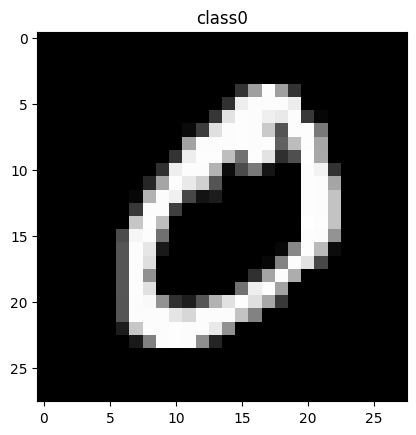

In [10]:
plt.imshow(digits_data[1],cmap='gray')
plt.title('class'+str(digits_labels[1]));

In [11]:
sns.countplot(digits_labels);

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7fe167703d90> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fe167703010> (for post_execute):


KeyboardInterrupt: 

In [12]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2024-06-28 12:10:04--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip.1’

alfabeto_A-Z.zip.1  100%[===================>] 184.67M   184MB/s    in 1.0s    

2024-06-28 12:10:05 (184 MB/s) - ‘alfabeto_A-Z.zip.1’ saved [193643888/193643888]



In [13]:
zip_object=zipfile.ZipFile(file='/content/alfabeto_A-Z.zip',mode='r')
zip_object.extractall('./')
zip_object.close()

In [14]:
dataset_az=pd.read_csv('/content/A_Z Handwritten Data.csv')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
alphabet_data=dataset_az.drop('0',axis=1)
alphabet_labels=dataset_az['0']


In [18]:
alphabet_data.shape


(372450, 28, 28)

In [16]:
alphabet_labels.shape

(372450,)

In [17]:
alphabet_data=np.reshape(alphabet_data.values,(alphabet_data.shape[0], 28, 28))

In [19]:
alphabet_data.shape

(372450, 28, 28)

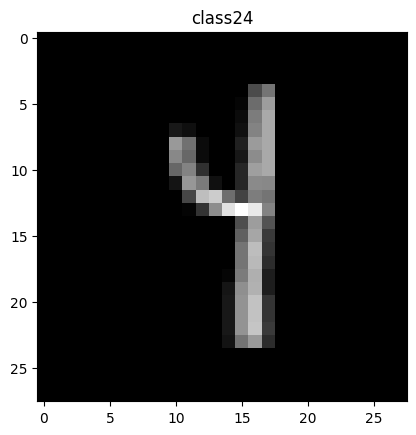

In [20]:
index=np.random.randint(0,alphabet_data.shape[0])
plt.imshow(alphabet_data[index],cmap='gray')
plt.title('class'+str(alphabet_labels[index]));

In [21]:
digits_data,np.unique(digits_labels)

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [22]:
data=np.vstack([alphabet_data,digits_data])
labels=np.hstack([alphabet_labels,digits_labels])

In [23]:
data.shape,labels.shape

((442450, 28, 28), (442450,))

In [24]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [25]:
data=np.array(data,dtype='float32')

In [26]:
data=np.expand_dims(data,axis=-1)

In [27]:
data.shape

(442450, 28, 28, 1)

In [28]:
data[0].min(),data[0].max()

(0.0, 255.0)

In [29]:
data/=255.0

In [30]:
data[0].min(),data[0].max()

(0.0, 1.0)

In [31]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [32]:
len(np.unique(labels))

26

In [33]:
le=LabelBinarizer()
labels=le.fit_transform(labels)


In [34]:
np.unique(labels)

array([0, 1])

In [35]:
labels[0],len(labels[0])

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]),
 26)

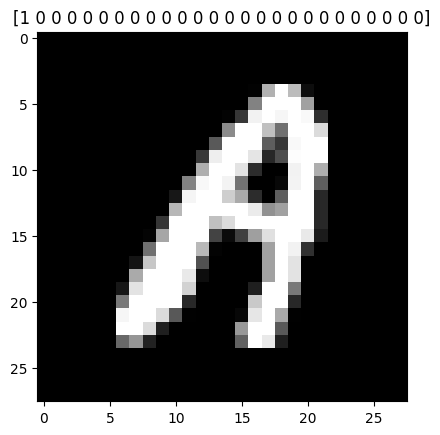

In [36]:
plt.imshow(data[0].reshape(28,28),cmap='gray')
plt.title(str(labels[0]));

In [37]:
classes_total=labels.sum(axis=0)
classes_total

array([20772, 16545, 30399, 17275, 18264,  7476, 12638, 14511,  7945,
       15451,  5603, 11586, 12336, 19010, 57825, 19341,  5812, 11566,
       48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [38]:
classes_total.max()

57825

In [39]:
classes_weights={}
for i in range(0,len(classes_total)):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [40]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=1,stratify=labels)

In [41]:
X_train.shape,X_test.shape

((353960, 28, 28, 1), (88490, 28, 28, 1))

In [42]:
y_train.shape,y_test.shape

((353960, 26), (88490, 26))

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
augmentation=ImageDataGenerator(rotation_range=10,zoom_range=0.05,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=False)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [47]:
network=Sequential()
network.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
network.add(MaxPooling2D((2,2)))

network.add(Conv2D(64,(3,3),activation='relu',padding='same'))
network.add(MaxPooling2D((2,2)))

network.add(Conv2D(128,(3,3),activation='relu',padding='valid'))
network.add(MaxPooling2D((2,2)))

network.add(Flatten())
network.add(Dense(64,activation='relu'))
network.add(Dense(128,activation='relu'))

network.add(Dense(26,activation='softmax'))

network.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [48]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [49]:
name_labels='0123456789'
name_labels+='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels=[l for l in name_labels]



In [50]:
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [51]:
file_model='custom_ocr.model'
epochs=20
batch_size=128

In [52]:
checkpointer=ModelCheckpoint(file_model,monitor='val_loss',verbose=1,save_best_only=True)

In [53]:
history=network.fit(augmentation.flow(X_train,y_train,batch_size=batch_size),steps_per_epoch=len(X_train)//batch_size,epochs=epochs,validation_data=(X_test,y_test),class_weight=classes_weights,verbose=1,callbacks=[checkpointer])

Epoch 1/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.4039 - accuracy: 0.8792
Epoch 1: val_loss improved from inf to 0.17741, saving model to custom_ocr.model
2765/2765 [==============================] - 200s 70ms/step - loss: 0.4038 - accuracy: 0.8792 - val_loss: 0.1774 - val_accuracy: 0.9433
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.1844 - accuracy: 0.9432
Epoch 2: val_loss improved from 0.17741 to 0.13425, saving model to custom_ocr.model
2765/2765 [==============================] - 176s 64ms/step - loss: 0.1844 - accuracy: 0.9432 - val_loss: 0.1342 - val_accuracy: 0.9583
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.1550 - accuracy: 0.9514
Epoch 3: val_loss did not improve from 0.13425
2765/2765 [==============================] - 181s 65ms/step - loss: 0.1550 - accuracy: 0.9514 - val_loss: 0.1403 - val_accuracy: 0.9563
Epoch 4/20
2765/2765 [==============================] - ETA: 0s - loss: 0.1381 - accu

In [54]:
X_test.shape

(88490, 28, 28, 1)

In [55]:
prediction=network.predict(X_test,batch_size=batch_size)

692/692 [==============================] - 3s 4ms/step


In [56]:
 prediction.shape

(88490, 26)

In [57]:
prediction[0]

array([8.9829351e-04, 4.1732518e-03, 6.3090533e-02, 2.3904502e-07,
       2.3225686e-04, 1.4346477e-06, 1.5741413e-03, 1.9423301e-04,
       1.6051985e-05, 1.9113719e-07, 8.2100350e-01, 1.7237958e-02,
       4.5965724e-03, 4.0630877e-02, 8.1949518e-05, 3.9036504e-06,
       1.1623505e-10, 4.2686421e-02, 1.0588426e-05, 4.6452697e-05,
       2.2505663e-05, 2.4537608e-09, 1.0322020e-03, 2.4531260e-03,
       1.0646508e-05, 2.6213293e-06], dtype=float32)

In [58]:
len(prediction[0])

26

In [61]:
np.argmax(prediction[0])

10

In [62]:
name_labels[24]

'O'

In [63]:
name_labels[22]

'M'

In [64]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [66]:
np.argmax(y_test[0])

10

In [67]:
name_labels[np.argmax(y_test[0])]

'A'

In [69]:
network.evaluate(X_test,y_test)

2766/2766 [==============================] - 12s 4ms/step - loss: 0.1084 - accuracy: 0.9662


[0.10842127352952957, 0.9661656618118286]

In [71]:
print(classification_report(np.argmax(y_test,axis=1),np.argmax(prediction,axis=1),target_names=name_labels))

ValueError: Number of classes, 26, does not match size of target_names, 36. Try specifying the labels parameter

In [72]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

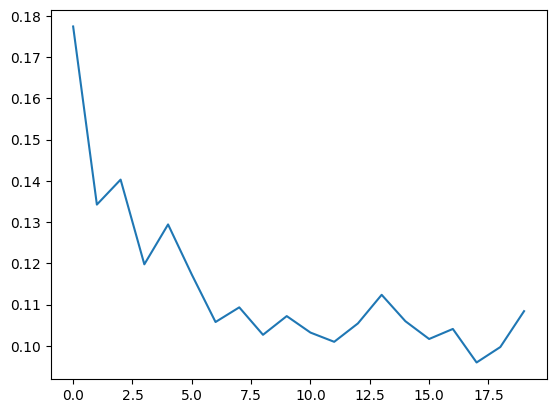

In [74]:
plt.plot(history.history['val_loss'])

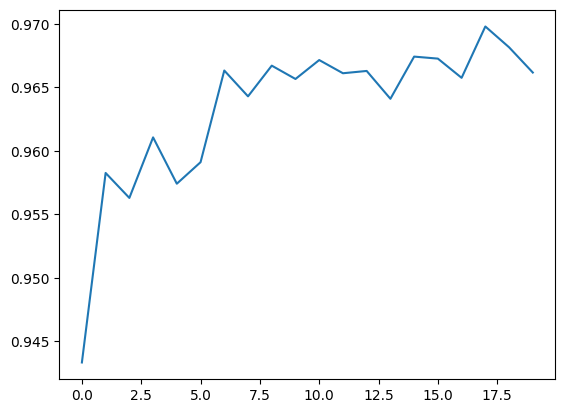

In [75]:
plt.plot(history.history['val_accuracy'])

In [76]:
from tensorflow.keras.models import load_model

In [77]:
loaded_network=load_model('/content/network')

In [78]:
loaded_network

In [79]:
loaded_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [80]:
img=cv2.imread('/content/letter-m.jpg')

In [82]:
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [83]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [84]:
img.shape

(30, 30, 3)

In [85]:
gray.shape

(30, 30)

In [86]:
cv2_imshow(gray)

In [91]:
value,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

In [92]:
thresh

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,
          0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,
          0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,
        255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,
        255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,
        255, 255, 255,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0,   0,
        255, 255,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255,   0,   0, 255, 255,   0,   0, 255,
        255, 255,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255,   0,   0, 255, 255,   0,   0, 255,
        255, 255,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255,   0,   0, 255, 255, 255,   0, 255,
        255, 255,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255,   0,   0,   0, 255, 255, 255, 255,
        255, 255,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255,   0,   0,   0, 255, 255, 255, 255,
        255, 255,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255,   0,   0,   0,   0, 255, 255, 255,
        255, 255,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255,   0,   0,   0,   0, 255, 255, 255,
        255,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0, 255, 255,
        255,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0, 255, 255,
        255,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0, 255, 255,
        255, 255,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0, 255, 255,
        255, 255,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
    

In [93]:
cv2_imshow(thresh)

In [94]:
value

137.0

In [95]:
img=cv2.resize(thresh,(28,28))
cv2_imshow(img)

In [96]:
img.shape

(28, 28)

In [98]:
img=img.astype('float32')/255.0
img=np.expand_dims(img,axis=-1)
img.shape

(28, 28, 1)

In [99]:
img=np.reshape(img,(1,28,28,1))

In [100]:
img.shape

(1, 28, 28, 1)

In [101]:
prediction=loaded_network.predict(img)

1/1 [==============================] - 2s 2s/step


In [102]:
prediction

array([[1.7910531e-04, 7.8215018e-02, 8.1884809e-04, 1.1040025e-05,
        6.4029763e-03, 4.1478984e-03, 6.9321417e-03, 5.4562283e-03,
        9.8538613e-03, 3.7172034e-03, 1.9548807e-02, 4.6153227e-04,
        5.8234669e-02, 2.9509261e-03, 2.0100432e-02, 5.2963072e-03,
        2.3070080e-02, 4.6325937e-02, 3.2968153e-04, 2.6693843e-02,
        2.2145981e-02, 8.7418467e-02, 3.0814728e-03, 1.0962985e-02,
        2.0570159e-02, 8.9151718e-02, 2.0083792e-04, 4.8836516e-03,
        2.6329173e-02, 8.7545872e-02, 1.2885610e-02, 5.9926263e-03,
        1.3171408e-02, 4.6252124e-03, 2.8988567e-01, 2.4025890e-03]],
      dtype=float32)

In [103]:
prediction.shape

(1, 36)

In [104]:
np.argmax(prediction)

34

In [105]:
name_labels[22]

'M'

In [ ]:
i